In [70]:
%load_ext autoreload
%autoreload 2

import smart_import
import numpy as np
import matplotlib.pyplot as plt

from quanalys.acquisition_notebook import AcquisitionAnalysisManager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# AcquisitionManager and AnalysisManager

In [71]:
aqm = AcquisitionAnalysisManager("tmp_data", use_magic=False, save_files=False)
# Creates (or loads) the temporary json file ...\measurements\Cooldown_2022_12_12_die5_Gflux_22_CEA_v1\\quanalysis_tmp.json

aqm.set_config_file(["dummy_config1.txt", "dummy_config2.txt"])
# A snapshot of all files in this list will be backed-up with the data.

## Example 1: acquisition with a blocking function

In [72]:
aqm.acquisition_cell('simple_sine')

def acquire_data():
    x = np.linspace(0, 20*np.pi, 101)
    y = np.sin(x)
    return x, y

x, y = acquire_data()

aqm.save_acquisition(x=x, y=y)

INFO:quanalys.acquisition_notebook.acquisition_analysis_manager:2023_01_16__20_31_32__simple_sine


INFO:quanalys.acquisition_notebook.acquisition_analysis_manager:2023_01_16__20_31_32__simple_sine


name fit


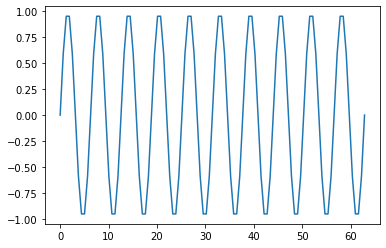

In [73]:
aqm.analysis_cell()

fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)

aqm.save_fig(fig, name="fit")

## Example 2: acquisition with a standalone platform (e.g. Quantum Machine)

In [74]:
aqm.acquisition_cell('sine_qm')

# The code contained in this cell is important as it defines how the data are acquired.

def fetch_new_data():
    """
    This code mimics 
    """
    x = np.linspace(0, 20*np.pi, 101)
    y = np.sin(x)
    return x, y + np.random.random(len(x))

#submit job to the quantum machine if needed

INFO:quanalys.acquisition_notebook.acquisition_analysis_manager:2023_01_16__20_31_35__sine_qm


INFO:quanalys.acquisition_notebook.acquisition_analysis_manager:2023_01_16__20_31_35__sine_qm


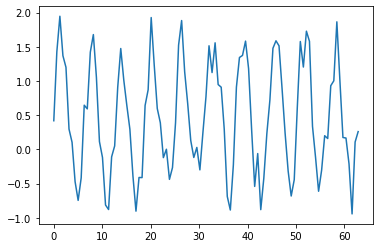

In [78]:
aqm.analysis_cell()

# print(aqm.is_loaded_data)

# This cell might retrieve some data from a standalone acquisition platform (like a quantum machine for instance)
if aqm.current_acquisition is not None:
    x, y = fetch_new_data()
    aqm.save_acquisition(x=x, y=y) # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime (as long as x and y are retrieved somehow)

# Actually, one should 
fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)

aqm.save_fig(fig, name="fit")


## Example 3: analysis on reloaded data

INFO:quanalys.acquisition_notebook.acquisition_analysis_manager:old_data_example


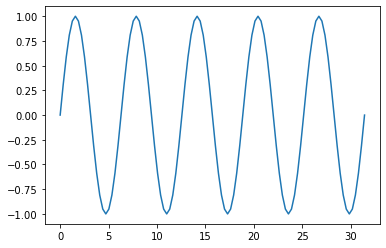

In [82]:
aqm.analysis_cell("../../tests/data/old_data_example")
# The name of the h5 file is sufficient if it is located in the current data_path. Otherwise, a fullpath can be provided.

if aqm.current_acquisition is not None: # when an h5 file is specified above, then data should not be fetched anymore
    x, y = fetch_new_data()
    aqm.save_acquisition(x=x, y=y) # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime (as long as x and y are retrieved somehow)

fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)
aqm.save_fig(fig); # even with loaded data, the analysis script and figures are overwritten


## Example 3.2: analysis on reloaded data with the saved code

In [83]:
aqm.analysis_cell("../../tests/data/old_data_example2").get_analysis_code()


INFO:quanalys.acquisition_notebook.acquisition_analysis_manager:old_data_example2


"aqm.analysis_cell('../../tests/data/old_data_example2')\n\nplt.figure()\nplt.plot(aqm.data.x_loop.x, aqm.data.x_loop.y)\n\naqm.save_fig()\nplt.show()\n# \n# print(aqm.d.z)"

## Example 4: loop

In [85]:
from quanalys.acquisition_utils import AcquisitionLoop

In [107]:
aqm.acquisition_cell("sample_loop")

aqm.aq.x_loop = loop = AcquisitionLoop()
for i in loop(1, 10, .5):
    loop(x=i, y=i**2)
    
aqm.save_acquisition();


INFO:quanalys.acquisition_notebook.acquisition_analysis_manager:2023_01_16__20_42_25__sample_loop


INFO:quanalys.acquisition_notebook.acquisition_analysis_manager:2023_01_16__20_42_25__sample_loop


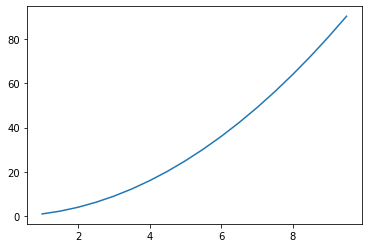

In [108]:
aqm.analysis_cell()

plt.figure()
plt.plot(aqm.data.x_loop.x, aqm.data.x_loop.y)

aqm.save_fig()
plt.show()
# 
# print(aqm.d.z)

## Parse config file

In [109]:
aqm = AcquisitionAnalysisManager("tmp_data/", use_magic=False, save_files=False)
aqm.set_config_file("dummy_config1.txt")
aqm.acquisition_cell("test")
aqm.save_acquisition()

INFO:quanalys.acquisition_notebook.acquisition_analysis_manager:2023_01_16__20_42_28__test


In [112]:
aqm.parse_config('dummy_config1')['a']

123